In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_val_score

In [4]:
X = pd.read_csv('X_train.csv')
y = pd.read_csv('y_train.csv')

In [5]:
# Usuwamy kolumny z indeksami, zastępujęmy braki danych wartościami NaN oraz usuwamy wiersze, w których wszystkie wartości są NaN
X = X.drop('Unnamed: 0', axis =1)
X = X.replace([-9,-8,-7],np.nan) 
X.X10 = X.X10.replace({5:np.nan, 6:np.nan, 8:7})
X.X11 = X.X11.replace({7:np.nan})

X = X.dropna(axis=0, how='all')

y = y.drop('Unnamed: 0', axis =1)
y = y.replace({'Good':0, 'Bad':1})
y = y.loc[X.index]

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3457 entries, 0 to 3659
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      3453 non-null   float64
 1   X2      3386 non-null   float64
 2   X3      3457 non-null   float64
 3   X4      3457 non-null   float64
 4   X5      3457 non-null   float64
 5   X6      3457 non-null   float64
 6   X7      3457 non-null   float64
 7   X8      3457 non-null   float64
 8   X9      1709 non-null   float64
 9   X10     2271 non-null   float64
 10  X11     3409 non-null   float64
 11  X12     3457 non-null   float64
 12  X13     3457 non-null   float64
 13  X14     3457 non-null   float64
 14  X15     2653 non-null   float64
 15  X16     3457 non-null   float64
 16  X17     3457 non-null   float64
 17  X18     3392 non-null   float64
 18  X19     2212 non-null   float64
 19  X20     3401 non-null   float64
 20  X21     3137 non-null   float64
 21  X22     3223 non-null   float64
 22  

In [5]:
X.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,3453.000000,3386.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,1709.000000,2271.000000,...,3457.000000,2653.000000,3457.000000,3457.000000,3392.000000,2212.000000,3401.000000,3137.000000,3223.000000,3447.000000
mean,72.245584,198.727112,9.958056,78.558866,20.929997,0.577090,0.382123,92.538039,22.209479,5.762660,...,34.718831,2.437618,1.485392,1.426092,34.548349,67.778029,4.038812,2.436085,1.075706,66.224543
std,9.962179,97.279900,14.514111,34.146718,11.246386,1.276309,1.051649,11.665392,20.641342,1.967475,...,17.895455,4.740272,2.007041,1.959616,28.801173,24.280641,3.010808,1.560170,1.496896,22.036680
min,33.000000,4.000000,0.000000,4.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,65.000000,133.000000,3.000000,57.000000,13.000000,0.000000,0.000000,90.000000,5.000000,4.000000,...,22.000000,0.000000,0.000000,0.000000,9.000000,53.000000,2.000000,1.000000,0.000000,50.000000
50%,72.000000,184.000000,6.000000,76.000000,20.000000,0.000000,0.000000,98.000000,15.000000,7.000000,...,33.000000,0.000000,1.000000,1.000000,29.000000,73.000000,3.000000,2.000000,1.000000,67.000000
75%,80.000000,255.000000,12.000000,97.000000,28.000000,1.000000,0.000000,100.000000,34.000000,7.000000,...,45.000000,3.000000,2.000000,2.000000,55.000000,87.000000,5.000000,3.000000,2.000000,83.000000
max,94.000000,789.000000,383.000000,383.000000,74.000000,19.000000,19.000000,100.000000,81.000000,9.000000,...,100.000000,24.000000,24.000000,24.000000,232.000000,190.000000,32.000000,23.000000,13.000000,100.000000


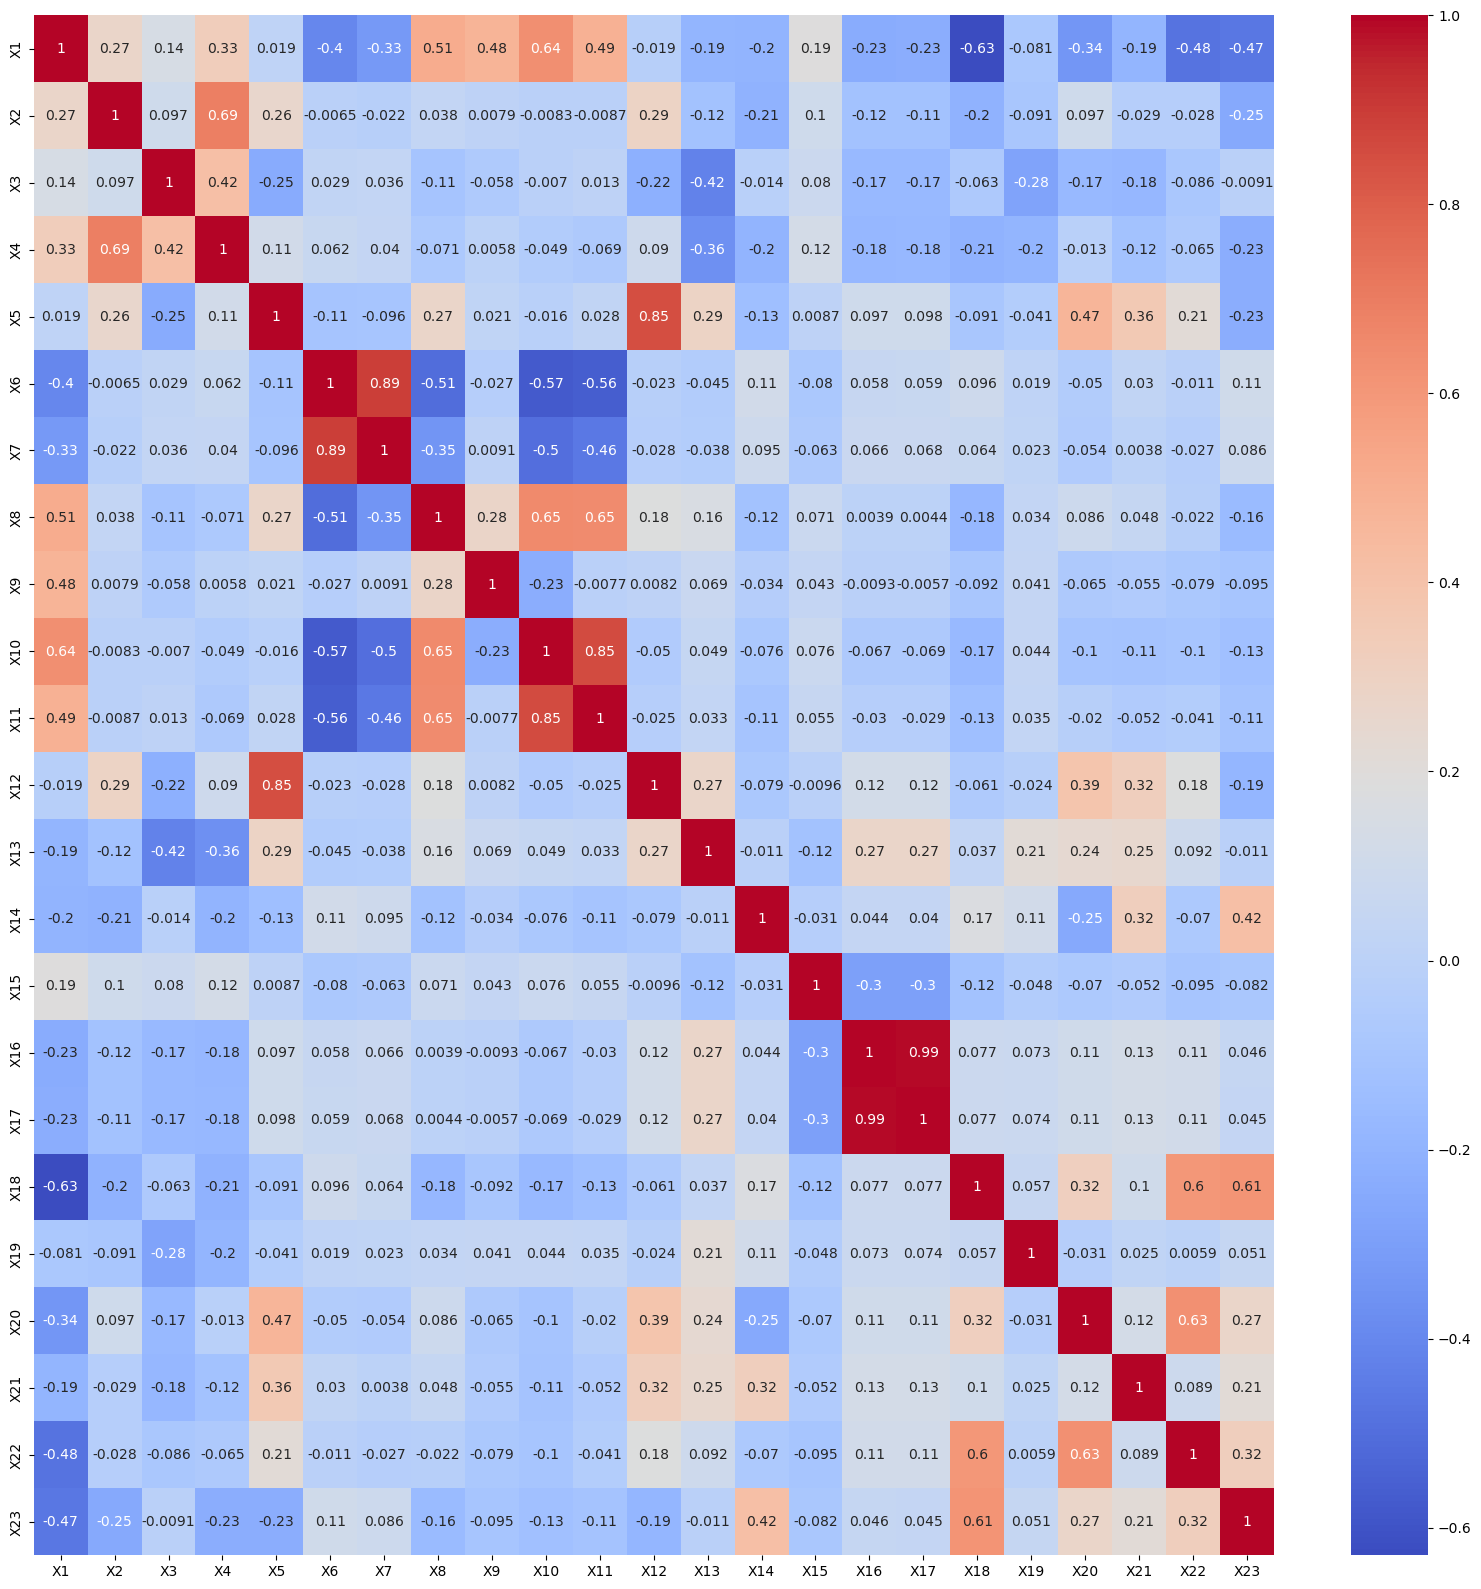

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.show() #Sprawdzamy współczynniki korelacji Persona między zmiennymi

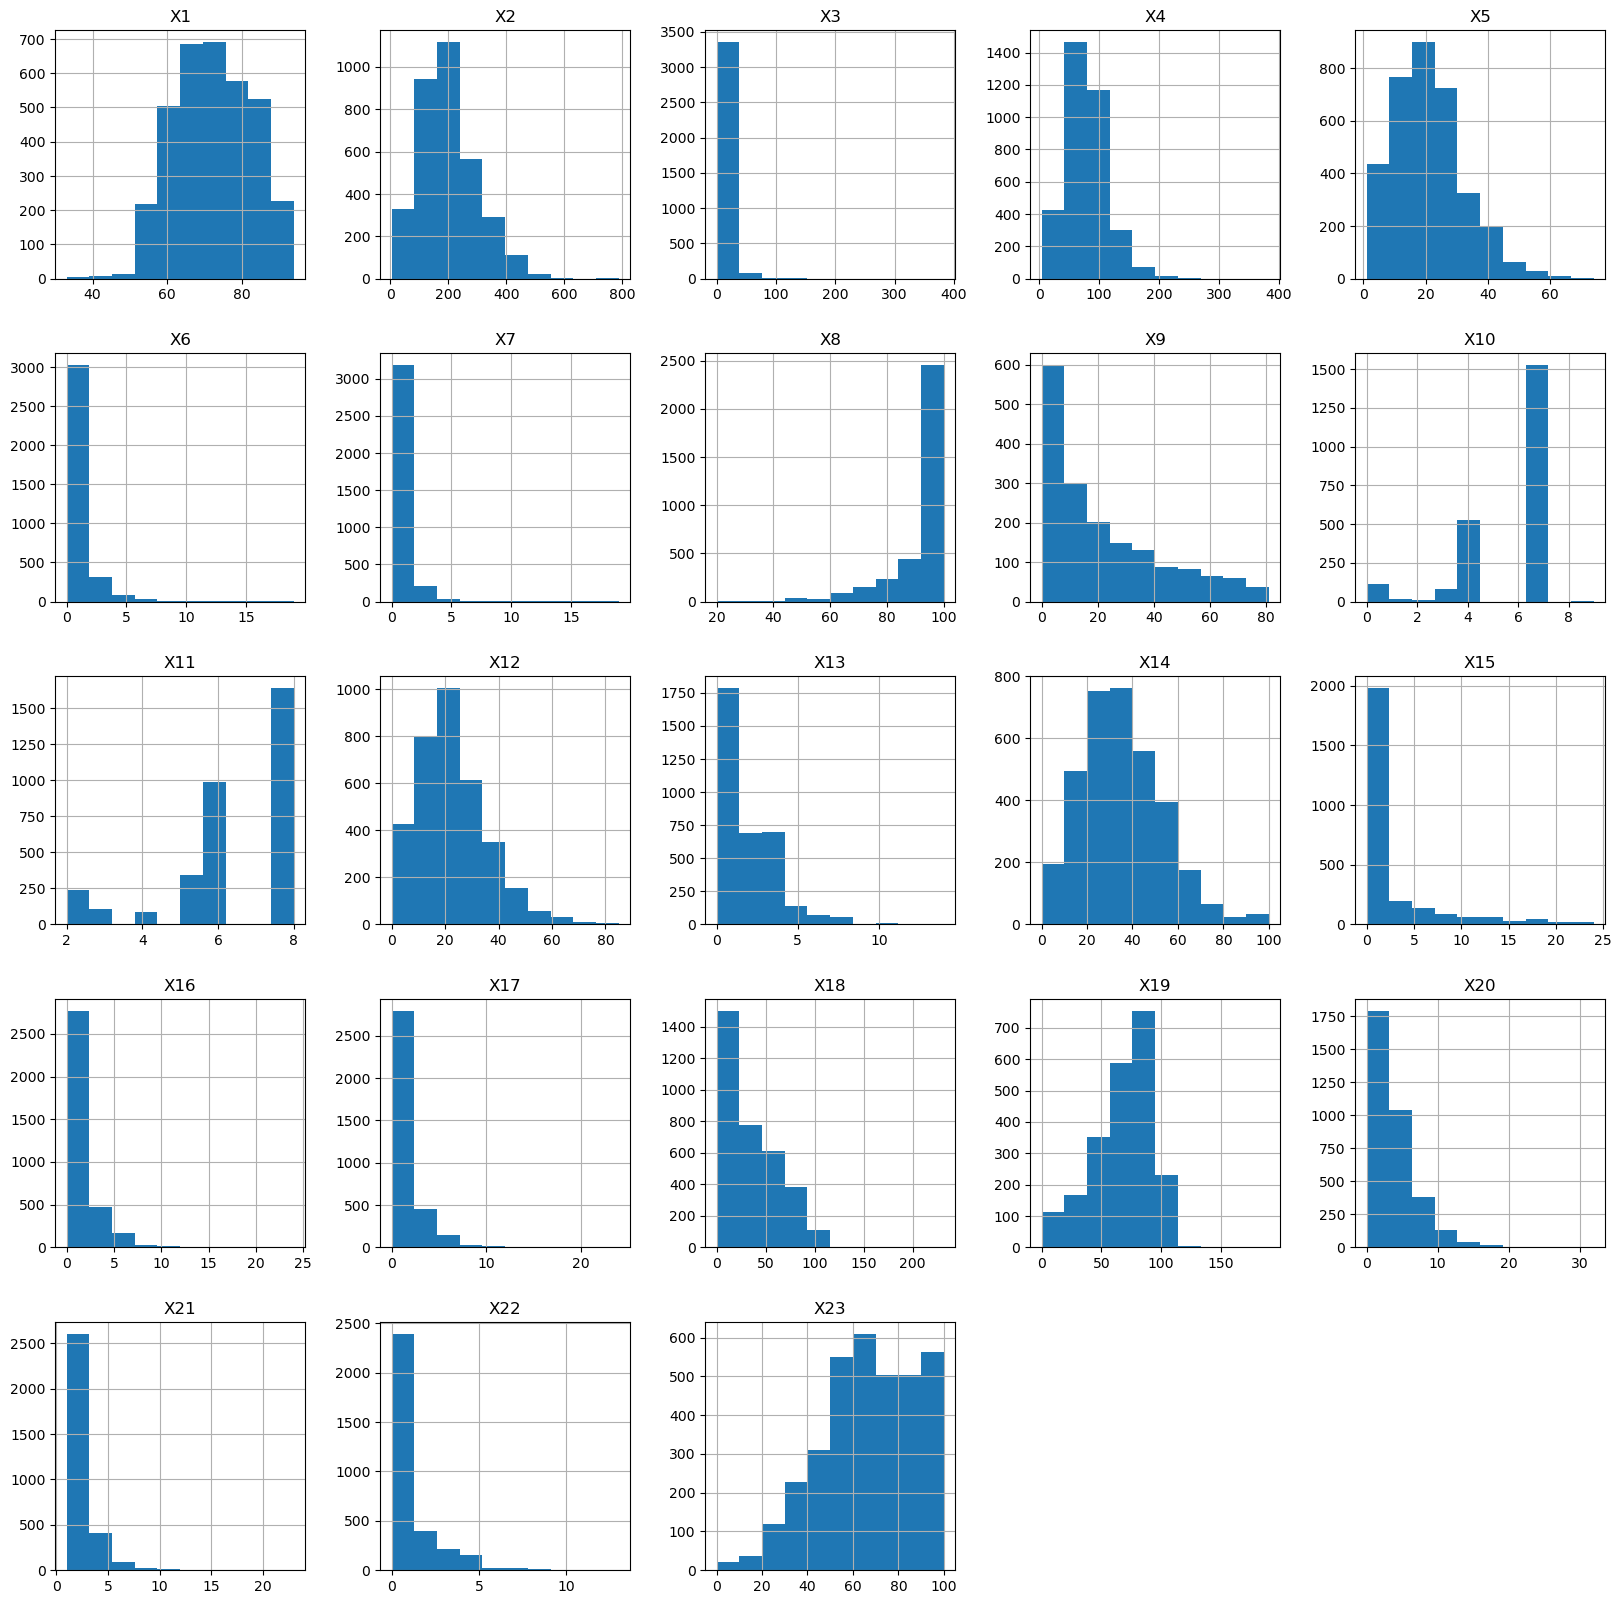

In [7]:
X.hist(figsize=(20,20)); #Sprawdzamy rozkłady poszczególnych zmiennych

In [6]:
# Przekształcamy zmienne lewoskośne funkcją logarytmiczną, aby uzyskać rozkład zbliżony do normalnego
X.X2 = np.log(X.X2+1)
X.X3 = np.log(X.X3+1)
X.X4 = np.log(X.X4+1)
X.X5 = np.log(X.X5+1)
X.X6 = np.log(X.X6+1)
X.X7 = np.log(X.X7+1)
X.X9 = np.log(X.X9+1)
X.X12 = np.log(X.X12+1)
X.X13 = np.log(X.X13+1)
X.X15 = np.log(X.X15+1)
X.X16 = np.log(X.X16+1)
X.X17 = np.log(X.X17+1)
X.X18 = np.log(X.X18+1)
X.X20 = np.log(X.X20+1)
X.X21 = np.log(X.X21+1)
X.X22 = np.log(X.X22+1)

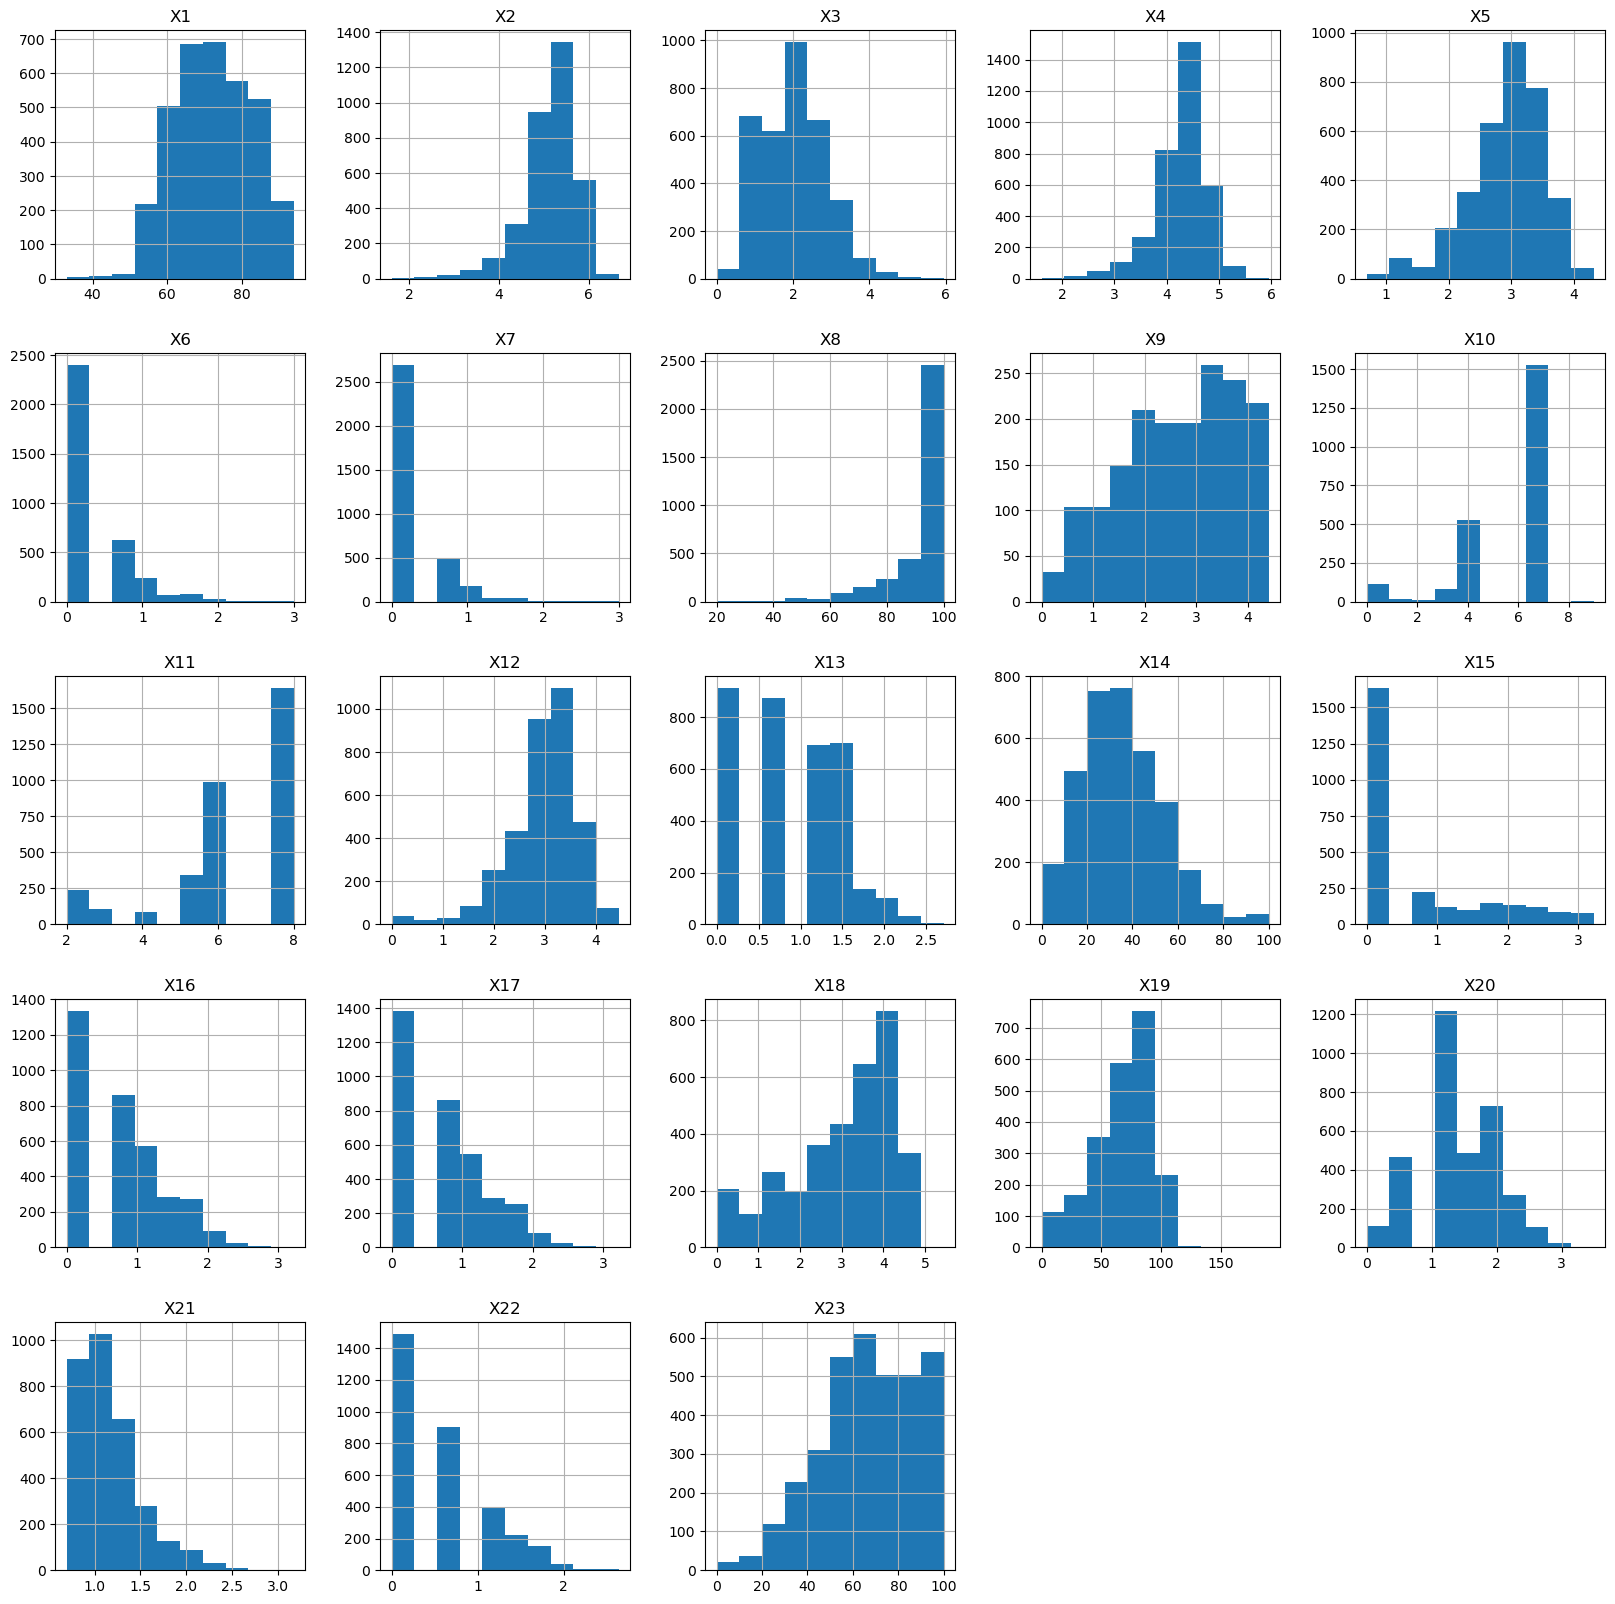

In [9]:
X.hist(figsize=(20,20)); #Rozkłady po zmianie

In [10]:
(X.isna().sum()/X.shape[0])*100

X1      0.115707
X2      2.053804
X3      0.000000
X4      0.000000
X5      0.000000
X6      0.000000
X7      0.000000
X8      0.000000
X9     50.564073
X10    34.307203
X11     1.388487
X12     0.000000
X13     0.000000
X14     0.000000
X15    23.257159
X16     0.000000
X17     0.000000
X18     1.880243
X19    36.013885
X20     1.619902
X21     9.256581
X22     6.768875
X23     0.289268
dtype: float64

In [7]:
X = X.drop(['X17'], axis=1) # Usuwamy zmienną X17 z powodu zbyt dużego skorelowania z zmienną X16


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [17]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X13,X14,X15,X16,X18,X19,X20,X21,X22,X23
0,79.0,5.545177,2.708050,4.605170,3.401197,0.0,0.0,97.0,NaN,NaN,...,0.000000,67.0,NaN,0.000000,4.262680,60.0,1.098612,1.386294,0.000000,71.0
1,77.0,4.127134,1.098612,3.526361,2.708050,0.0,0.0,100.0,NaN,7.0,...,0.693147,7.0,3.091042,0.000000,3.332205,NaN,1.609438,0.693147,0.000000,56.0
2,55.0,4.744932,1.945910,4.094345,2.995732,0.0,0.0,89.0,1.791759,4.0,...,0.693147,53.0,0.000000,0.693147,4.584967,90.0,2.197225,1.098612,1.945910,100.0
3,75.0,5.278115,1.098612,4.174387,3.610918,0.0,0.0,100.0,NaN,7.0,...,1.791759,29.0,NaN,1.098612,4.007333,79.0,2.302585,1.945910,1.098612,83.0
4,77.0,4.997212,1.386294,4.189655,2.772589,0.0,0.0,93.0,3.433987,NaN,...,1.098612,33.0,0.000000,1.386294,3.091042,37.0,1.098612,1.098612,0.000000,44.0


In [31]:
y.value_counts()/y.shape[0]*100 # Sprawdzamy, czy zbiór jest zbalansowany

RiskPerformance
1                  52.183975
0                  47.816025
dtype: float64

In [9]:
numerical_features = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X12','X13','X14','X15','X16','X18','X19','X20','X21','X22','X23']
categorical_features = ['X10','X11']

numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(add_indicator=True)),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(add_indicator=True)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('numerical', numerical_transformer, numerical_features),
    ('categorical', categorical_transformer, categorical_features)
]) #Przygotowujemy pipeline do przetwarzania danych

Regresja logistyczna

In [94]:
pipelin_reg = Pipeline([
    ('pre', preprocessor),
    ('reg',LogisticRegression(penalty='l1', solver='liblinear'))
])
params = {'reg__C': [0.25,0.5,0.75,1,2,3,5,10,25,40,50,100,150,500,1000,2000,10000],
           'reg__max_iter': [100,1000,5000,10000,20000,50000], 
           'pre__numerical__imputer__strategy': ['mean', 'median', 'most_frequent'],
           'pre__categorical__imputer__strategy': ['most_frequent', 'constant']}

log_reg = RandomizedSearchCV(pipelin_reg, params, n_iter=100, cv=5, scoring='balanced_accuracy', n_jobs=-1)
log_reg.fit(X_train, y_train.values.ravel())
pred = log_reg.predict(X_test)
balanced_accuracy_score(y_test, pred) #budujemy model regresji logistycznej z kara l1, a nastepnie szukamy najbardziej optymalnych parametrów

0.7599071103982893

In [95]:
log_reg.best_params_

{'reg__max_iter': 10000,
 'reg__C': 0.5,
 'pre__numerical__imputer__strategy': 'mean',
 'pre__categorical__imputer__strategy': 'constant'}

In [96]:
log_reg.best_estimator_.named_steps['reg'].coef_

array([[-0.44503016, -0.05126896,  0.        , -0.27910074, -0.25638378,
         0.09527571,  0.        , -0.14632706, -0.11155276, -0.00541663,
        -0.00448174,  0.14535597, -0.27089531,  0.08559305,  0.16329477,
        -0.00331672,  0.04624335, -0.07218139,  0.24157763,  0.0573535 ,
         0.02576684,  0.        , -0.06592666,  0.05715827,  0.18842442,
        -0.02057062, -0.18987506,  0.04474548, -0.00068675, -0.05178341,
         0.        ,  0.        ,  0.        , -0.38013509,  0.17463773,
        -0.1503388 ,  0.        , -0.07547411, -0.16940789,  0.        ,
         0.18689421,  0.        ,  0.0452422 ,  0.        ,  0.        ,
         0.        ,  0.19401722, -0.00153915]])

In [97]:
cross_val_score(log_reg.best_estimator_, X_test, y_test.values.ravel(), cv=10, scoring='balanced_accuracy').mean() # Ten wynik bedziemy brac pod uwage w porwnaniu z innymi modelami

0.7515966386554622

In [127]:
pipelin_reg_e = Pipeline([
    ('pre', preprocessor),
    ('reg',LogisticRegression(penalty='elasticnet', solver='saga'))
])
params = {'reg__C': [0.25,0.5,0.75,1,2,3,5,10,25,40,50,100,150,500,1000],
           'reg__max_iter': [100,1000,5000], 
            'pre__numerical__imputer__strategy': ['mean', 'median', 'most_frequent'],
            'pre__categorical__imputer__strategy': ['most_frequent', 'constant'],
          'reg__l1_ratio': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}

log_reg_el = RandomizedSearchCV(pipelin_reg_e, params, n_iter=100, cv=5, scoring='balanced_accuracy', n_jobs=-1)
log_reg_el.fit(X_train, y_train.values.ravel())
pred = log_reg.predict(X_test)
balanced_accuracy_score(y_test, pred)

0.7599071103982893

In [130]:
log_reg_el.best_params_

{'reg__max_iter': 5000,
 'reg__l1_ratio': 0.6,
 'reg__C': 0.25,
 'pre__numerical__imputer__strategy': 'mean',
 'pre__categorical__imputer__strategy': 'most_frequent'}

In [129]:
cross_val_score(log_reg_el.best_estimator_, X_test, y_test.values.ravel(), cv=10, scoring='balanced_accuracy').mean() #Średni wynik modelu z karą elasticnet z krosswalidacji

0.7544117647058823

Las losowy

In [102]:
pipeline_las = Pipeline([
    ('pre', preprocessor),
    ('lin',RandomForestClassifier())
])
pipeline_las.fit(X_train, y_train.values.ravel())
pipeline_las.predict(X_test)
balanced_accuracy_score(y_test, pipeline_las.predict(X_test))

0.7310712376369954

In [106]:
params = {
    'pre__numerical__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'lin__n_estimators': [275,300,325,350,375,380,400,425,450,500],
    'lin__max_depth': [4,5,6,7,8,9,10],
    'lin__min_samples_split': [2,5,7,8,9,10,11,12,13,14],
    'lin__min_samples_leaf': [1,2,3,4,5,6],
    'lin__max_features': [None, 'sqrt', 'log2'],
    'lin__bootstrap': [True, False]
}
las_losowanie = RandomizedSearchCV(pipeline_las, param_distributions = params, n_iter = 50, cv = 5, n_jobs = -1, scoring = 'balanced_accuracy')
las_losowanie.fit(X_train, y_train.values.ravel())
las_losowanie.predict(X_test)
balanced_accuracy_score(y_test, las_losowanie.predict(X_test))

0.7441192194600375

In [118]:
las_losowanie.best_params_

{'pre__numerical__imputer__strategy': 'mean',
 'lin__n_estimators': 450,
 'lin__min_samples_split': 14,
 'lin__min_samples_leaf': 2,
 'lin__max_features': 'sqrt',
 'lin__max_depth': 7,
 'lin__bootstrap': False}

In [110]:
cross_val_score(las_losowanie.best_estimator_, X_test, y_test.values.ravel(), cv=10, scoring='balanced_accuracy').mean() #Sredni wynik modelu lasu losowego z krosswalidacji

0.7340756302521009

Gradient Boosting

In [115]:
pipeline_gb = Pipeline([
    ('pre', preprocessor),
    ('gb',GradientBoostingClassifier())
])
pipeline_gb.fit(X_train, y_train.values.ravel())
pipeline_gb.predict(X_test)
balanced_accuracy_score(y_test, pipeline_las.predict(X_test))

0.7310712376369954

In [116]:
params = {'pre__numerical__imputer__strategy': ['mean', 'median', 'most_frequent'],
          'pre__categorical__imputer__strategy': ['most_frequent', 'constant'],
          'gb__n_estimators': [50,100,200,300,400,500],
          'gb__learning_rate': [0.01,0.05,0.1,0.15,0.2,0.25,0.3],
          'gb__max_depth': [3,4,5,6,7],
          'gb__min_samples_split': [8,9,10,11,12,13,14,15,16],
          'gb__min_samples_leaf': [1,2,3,4],
          'gb__max_features': [None, 'sqrt', 'log2']
}
gb_losowanie = RandomizedSearchCV(pipeline_gb, param_distributions = params, n_iter = 100, cv = 5, n_jobs = -1, random_state = 50, scoring = 'balanced_accuracy')
gb_losowanie.fit(X_train, y_train.values.ravel())
pred =  gb_losowanie.predict(X_test)
balanced_accuracy_score(y_test, pred)

0.7484295642876235

In [121]:
gb_losowanie.best_params_

{'pre__numerical__imputer__strategy': 'median',
 'pre__categorical__imputer__strategy': 'constant',
 'gb__n_estimators': 200,
 'gb__min_samples_split': 13,
 'gb__min_samples_leaf': 3,
 'gb__max_features': 'log2',
 'gb__max_depth': 5,
 'gb__learning_rate': 0.01}

In [120]:
cross_val_score(gb_losowanie.best_estimator_, X_test, y_test.values.ravel(), cv=5, scoring='balanced_accuracy').mean() #Sredni wyinik modelu gradient boosting z krosswalidacji

0.7471142369991475

SVM

In [123]:
from sklearn.svm import SVC
pipeline_svm = Pipeline([
    ('pre', preprocessor),
    ('pca', PCA()),
    ('svm',SVC())
])
pipeline_svm.fit(X_train, y_train.values.ravel())
pipeline_svm.predict(X_test)
balanced_accuracy_score(y_test, pipeline_las.predict(X_test))

0.7310712376369954

In [124]:
params = {'pre__numerical__imputer__strategy': ['mean', 'median','most_frequent'],
           'pre__categorical__imputer__strategy': ['mean', 'median','most_frequent'],
          'svm__C': [0.25,0.75,3,5,10,25,50,100,150,200,500,1000],
            'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'svm__degree': [2,3,4,5,6,7],
            'svm__gamma': ['scale', 'auto'],
          'pca__n_components': [12,13,14,15,16,17,18,19,20]}
svm_losowanie = RandomizedSearchCV(pipeline_svm, param_distributions = params, n_iter =100, cv = 5, n_jobs = -1, scoring = 'balanced_accuracy')
svm_losowanie.fit(X_train, y_train.values.ravel())
pred =  svm_losowanie.predict(X_test)
balanced_accuracy_score(y_test, pred)

0.7483126169473403

In [125]:
svm_losowanie.best_params_

{'svm__kernel': 'linear',
 'svm__gamma': 'scale',
 'svm__degree': 7,
 'svm__C': 1000,
 'pre__numerical__imputer__strategy': 'mean',
 'pre__categorical__imputer__strategy': 'mean',
 'pca__n_components': 17}

In [126]:
cross_val_score(svm_losowanie.best_estimator_, X_test, y_test.values.ravel(), cv=10, scoring='balanced_accuracy').mean() #Sredni wynik modelu SVM z krosswalidacji

0.7442016806722689

Budowa ostatecznego modelu

In [10]:
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(add_indicator=True, strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(add_indicator=True,strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('numerical', numerical_transformer, numerical_features),
    ('categorical', categorical_transformer, categorical_features)
])

In [13]:
final_test = pd.read_csv('X_test.csv')

In [14]:
final_test = final_test.drop('Unnamed: 0', axis =1)
final_test = final_test.replace([-9,-8,-7],np.nan)
final_test.X10 = final_test.X10.replace({5:np.nan, 6:np.nan, 8:7})
final_test.X11 = final_test.X11.replace({7:np.nan})
final_test = final_test.dropna(axis=0, how='all')
final_test.X2 = np.log(final_test.X2+1)
final_test.X3 = np.log(final_test.X3+1)
final_test.X4 = np.log(final_test.X4+1)
final_test.X5 = np.log(final_test.X5+1)
final_test.X6 = np.log(final_test.X6+1)
final_test.X7 = np.log(final_test.X7+1)
final_test.X9 = np.log(final_test.X9+1)
final_test.X12 = np.log(final_test.X12+1)
final_test.X13 = np.log(final_test.X13+1)
final_test.X15 = np.log(final_test.X15+1)
final_test.X16 = np.log(final_test.X16+1)
final_test.X17 = np.log(final_test.X17+1)
final_test.X18 = np.log(final_test.X18+1)
final_test.X20 = np.log(final_test.X20+1)
final_test.X21 = np.log(final_test.X21+1)
final_test.X22 = np.log(final_test.X22+1)
final_test = final_test.drop(['X17'], axis=1) #Przeksztalcamy dane tak jak powyzej

In [22]:
finally_pipeline = Pipeline([('pre', preprocessor), ('reg', LogisticRegression(penalty='elasticnet', solver='saga'))])
params = {'reg__C': [0.1,0.25,0.5,0.75,1,2,3,5,10,25,40,50,100,150,500,1000],
           'reg__max_iter': [100,1000,5000], 
            'pre__numerical__imputer__strategy': ['mean', 'median', 'most_frequent'],
            'pre__categorical__imputer__strategy': ['most_frequent', 'constant'],
          'reg__l1_ratio': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.75,0.85,0.9]}

final = RandomizedSearchCV(finally_pipeline, params, n_iter=500, cv=5, scoring='balanced_accuracy', n_jobs=-1)
final.fit(X, y.values.ravel())

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('pre',
                                              ColumnTransformer(transformers=[('numerical',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(add_indicator=True)),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['X1',
                                                                                'X2',
                                                                                'X3',
                                                                                'X4',
                                                                                'X5',
                                                                                'X6',
                                                                                'X7',
                                                                                'X8',
                                                                                'X9',
                                                                                'X12',
                                                                                'X13',
                                                                                'X14',
                                                                                'X15',
                                                                                'X16',
                                                                                'X18',
                                                                                'X19',
                                                                                'X20',
                                                                                'X21',
                                                                                'X22',
                                                                                'X23']),
                                                                              ('categorical',
                                                                               Pipeline(steps=[('imputer',...
                   n_iter=500, n_jobs=-1,
                   param_distributions={'pre__categorical__imputer__strategy': ['most_frequent',
                                                                                'constant'],
                                        'pre__numerical__imputer__strategy': ['mean',
                                                                              'median',
                                                                              'most_frequent'],
                                        'reg__C': [0.1, 0.25, 0.5, 0.75, 1, 2,
                                                   3, 5, 10, 25, 40, 50, 100,
                                                   150, 500, 1000],
                                        'reg__l1_ratio': [0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7, 0.8,
                                                          0.75, 0.85, 0.9],
                                        'reg__max_iter': [100, 1000, 5000]},
                   scoring='balanced_accuracy')

In [32]:
final.best_params_

{'reg__max_iter': 5000,
 'reg__l1_ratio': 0.9,
 'reg__C': 0.1,
 'pre__numerical__imputer__strategy': 'mean',
 'pre__categorical__imputer__strategy': 'constant'}

In [33]:
result = final.predict_proba(final_test)[:, 1]
with open("327223_prediction.txt", "w") as f:
    for item in result:
        f.write(f"{item}\n")
